In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from an Excel file
df = pd.read_csv("C:/Users/priya/Downloads/Reviews.csv/Reviews.csv",  usecols=['Score', 'Summary', 'Text'])

#url = "https://raw.githubusercontent.com/username/repository/main/filename.csv"
#df = pd.read_csv(url)

In [3]:
# Inspect the first few rows to ensure the data is loaded correctly
#print(df.head())

# Drop the unneccessary columns
#df = df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'])

# Convert the dataframe to a list of lists for easier manipulation
dataset = df.values.tolist()

# Display the first 5 rows after preprocessing
print("Dataset after preprocessing (first 5 rows):")
print(df.head())
print("\n")

Dataset after preprocessing (first 5 rows):
   Score                Summary  \
0      5  Good Quality Dog Food   
1      1      Not as Advertised   
2      4  "Delight" says it all   
3      2         Cough Medicine   
4      5            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  




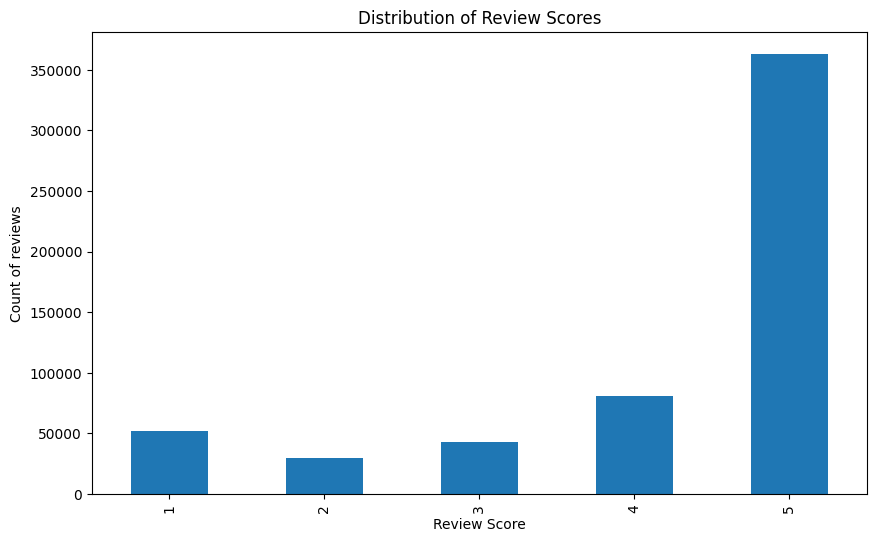

In [4]:
# Plot the distribution of actual scores before analysis
plt.figure(figsize=(10, 6))
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count of reviews')
plt.show()

In [5]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores and scale them to 0-5
def get_scaled_sentiment_scores(text):
    compound_score = sia.polarity_scores(text)['compound']
    # Scale from [-1, 1] to [0, 5]
    return (compound_score + 1) * 2.5

In [6]:
# Apply sentiment analysis to the 'Text' column
df['sentiment_score'] = df['Text'].apply(get_scaled_sentiment_scores)
print("\nSentiment analysis completed.")
print("\nFirst few rows with sentiment scores:")
print(df[['Text', 'Score', 'sentiment_score']].head())


Sentiment analysis completed.

First few rows with sentiment scores:
                                                Text  Score  sentiment_score
0  I have bought several of the Vitality canned d...      5          4.86025
1  Product arrived labeled as Jumbo Salted Peanut...      1          1.08400
2  This is a confection that has been around a fe...      4          4.53450
3  If you are looking for the secret ingredient i...      2          3.60100
4  Great taffy at a great price.  There was a wid...      5          4.86700


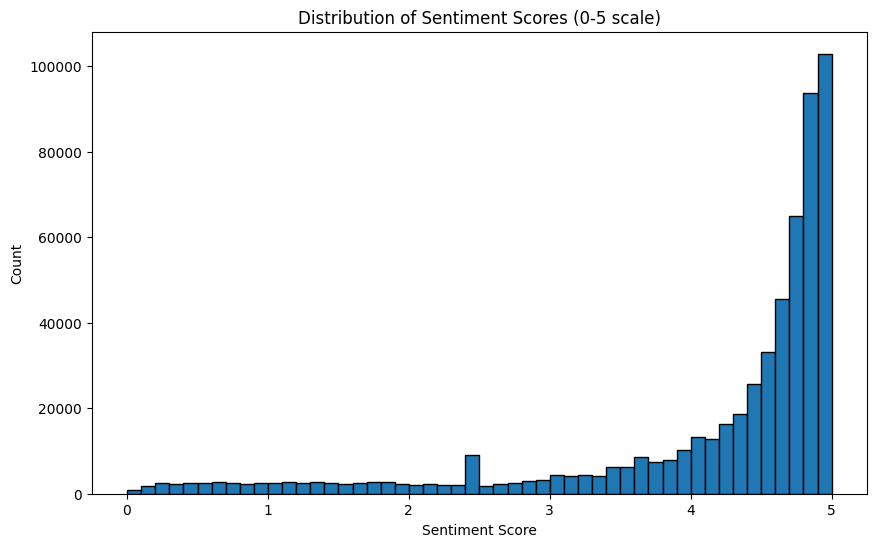

In [7]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=50, edgecolor='black')
plt.title('Distribution of Sentiment Scores (0-5 scale)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [8]:
# Prepare data for linear regression
X = df[['sentiment_score']]
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data split into training and testing sets.
Training set shape: (454763, 1)
Testing set shape: (113691, 1)


In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear regression model trained.")


Linear regression model trained.


In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
# Print results
print("\nModel Evaluation Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Model Evaluation Results:
Mean Squared Error: 1.25699554527318
R-squared Score: 0.2617878160408792
Coefficient: 0.5868822945182677
Intercept: 1.7430994456939959


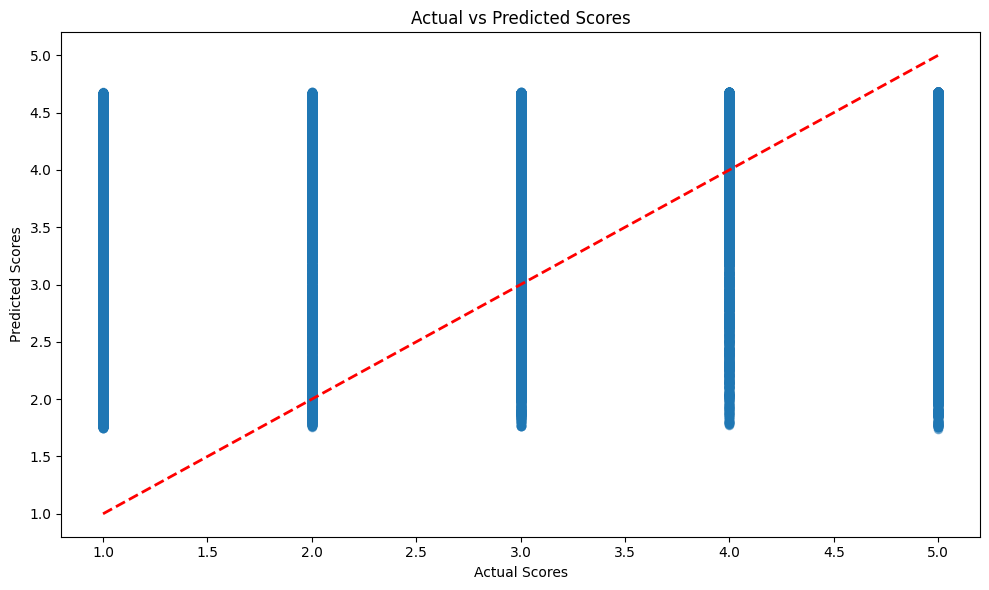

In [12]:
# Plot actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.tight_layout()
plt.show()

In [13]:
# Print correlation between sentiment scores and actual scores
correlation = df['sentiment_score'].corr(df['Score'])
print(f"\nCorrelation between sentiment scores and actual scores: {correlation}")


Correlation between sentiment scores and actual scores: 0.5090771892467494
